In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install keras

In [3]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

2024-06-14 14:54:33.194908: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-14 14:54:33.195056: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-14 14:54:33.443463: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [8]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [9]:
def plot_samples(x, y, num_samples=10):
    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(x[i], cmap='gray')
        plt.title(f"Label: {y[i]}")
        plt.axis('off')
    plt.show()

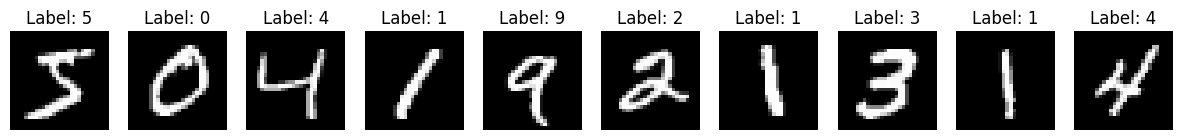

In [10]:
plot_samples(x_train, y_train, num_samples=10)

In [11]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [14]:

x_train=np.dstack([x_train] * 3)
x_test=np.dstack([x_test]*3)
x_train.shape,x_test.shape

((60000, 28, 84), (10000, 28, 84))

In [15]:
x_train = x_train.reshape(-1, 28,28,3)
x_test= x_test.reshape (-1,28,28,3)
x_train.shape,x_test.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [16]:

import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
def create_cnn_model(input_shape=(28, 28, 3)):
    model = models.Sequential()
    
    # First convolutional layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', strides=1, padding='valid', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Second convolutional layer
    model.add(layers.Conv2D(16, (3, 3), activation='relu', strides=1,padding='valid'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    
    # Flatten the output of the convolutional layers
    model.add(layers.Flatten())
    
    # Fully connected layer
    model.add(layers.Dense(64, activation='relu'))
    
    # Output layer with softmax activation for classification
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

# Create the model
model = create_cnn_model()

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 64)                2

In [17]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
1500/1500 [==============================] - 23s 14ms/step - loss: 0.2225 - accuracy: 0.9336 - val_loss: 0.0746 - val_accuracy: 0.9778
Epoch 2/5
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0692 - accuracy: 0.9789 - val_loss: 0.0807 - val_accuracy: 0.9754
Epoch 3/5
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0506 - accuracy: 0.9844 - val_loss: 0.0491 - val_accuracy: 0.9845
Epoch 4/5
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0416 - accuracy: 0.9865 - val_loss: 0.0440 - val_accuracy: 0.9861
Epoch 5/5
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0349 - accuracy: 0.9889 - val_loss: 0.0454 - val_accuracy: 0.9863


In [19]:
from sklearn.metrics import classification_report, confusion_matrix,precision_score,recall_score,f1_score

In [20]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 2s 5ms/step - loss: 0.0352 - accuracy: 0.9883
Test accuracy: 0.9883000254631042


In [21]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis=1)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      0.99      0.98      1010
           4       1.00      0.97      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [22]:
print("Precision_Score: ",precision_score(y_test, y_pred_classes,average='weighted'))
print("Recall_Score: ",recall_score(y_test, y_pred_classes,average='weighted'))
print("F1_Score: ",f1_score(y_test, y_pred_classes,average='weighted'))

Precision_Score:  0.9883817702914893
Recall_Score:  0.9883
F1_Score:  0.988300422081508


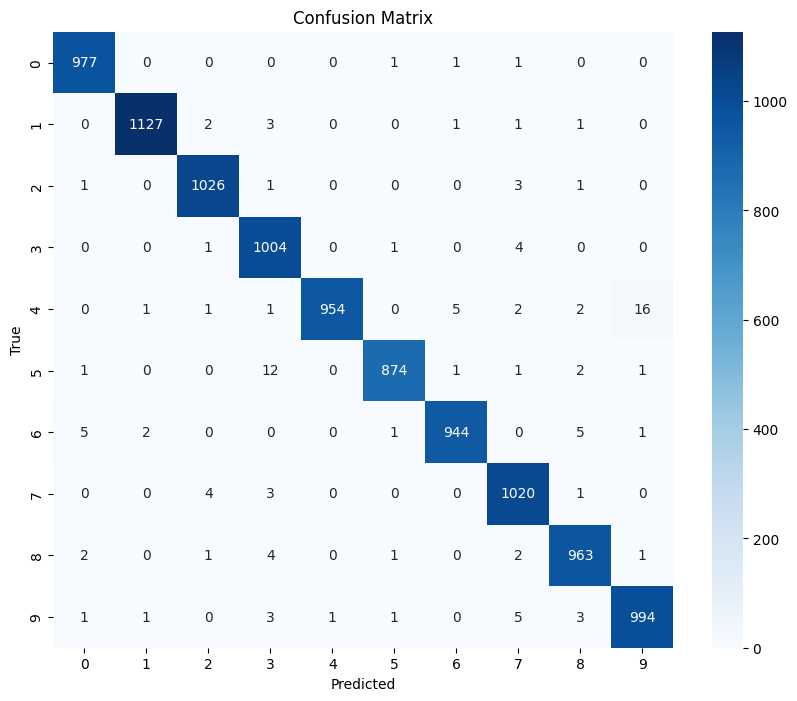

In [23]:
import seaborn as sns
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()